<a href="https://colab.research.google.com/github/YazGonzalezHerrera/Investigaci-n-de-operaciones/blob/main/PERT/CPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODELO DE REDES PARA IMPLEMENTACIÓN DE ESTRATEGIA DE DISPERSIÓN DE ACTIVOS**

Generaremos una red de proyecto tomando como base un portafolio de activos para poder tener una estrategia efectiva en la dispersión de los mismos.

Lista de actividades del proyecto:

In [ ]:
import pandas as pd
import numpy as np

#Crear tabla
Palabras= [
    'A', 'Analisis de universo de activos', '-', '5', '$15,000',
    'B', 'Recolección de datos historicos', 'A', '7', '$20,000',
    'C', 'Calculo de matriz de correlación', 'B', '4', '$12,000',
    'D', 'Definición de restricciones regulatorias', 'A', '3', '$8,000',
    'E', 'Clustering por sectores', 'C', '6', '$25,000',
    'F', 'Optimización de portafolio inicial', 'D, E', '8', '$30,000',
    'G', 'Analisis stress testing', 'F', '5', '$18,000',
    'H', 'Ajuste por limites de exposición', 'G', '4', '$15,000',
    'I', 'Documentación de estrategia', 'H', '6', '$22,000',
    'J', 'Aprobación comite de inversiones', 'I', '3', '$10,000',
    'K', 'Implementación operativa', 'J', '7', '$35,000',
    'L', 'Monitoreo inicial', 'K', '5', '$20,000',
]

tabla = pd.DataFrame(
    [Palabras[i: i + 5] for i in range(0, 60, 5)],
    columns=['Actividad', 'Descripción', 'Precesores', 'Duración (días)', 'Costo'],
    index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
)
print(tabla)

   Actividad                               Descripción Precesores  \
1          A           Analisis de universo de activos          -   
2          B           Recolección de datos historicos          A   
3          C          Calculo de matriz de correlación          B   
4          D  Definición de restricciones regulatorias          A   
5          E                   Clustering por sectores          C   
6          F        Optimización de portafolio inicial       D, E   
7          G                   Analisis stress testing          F   
8          H          Ajuste por limites de exposición          G   
9          I               Documentación de estrategia          H   
10         J          Aprobación comite de inversiones          I   
11         K                  Implementación operativa          J   
12         L                         Monitoreo inicial          K   

   Duración (días)    Costo  
1                5  $15,000  
2                7  $20,000  
3           

Teniendo la lista de actividades desarrollamos la ruta critica mediante un diagrama de red usando Networkx.

PROYECTO DISPERSIÓN DE ACTIVOS

 RESUMÉN DEL PROYECTO 
Duración total del proyecto: 60 días
Costo total del proyecto: $230,000
Número de actividades en ruta crítica: 11

 RUTA CRÍTICA 
A(5) → B(7) → C(4) → E(6) → F(8) → G(5) → H(4) → I(6) → J(3) → K(7) → L(5)
Duración de la ruta crítica: 60 días

Gráfico de la ruta crítica


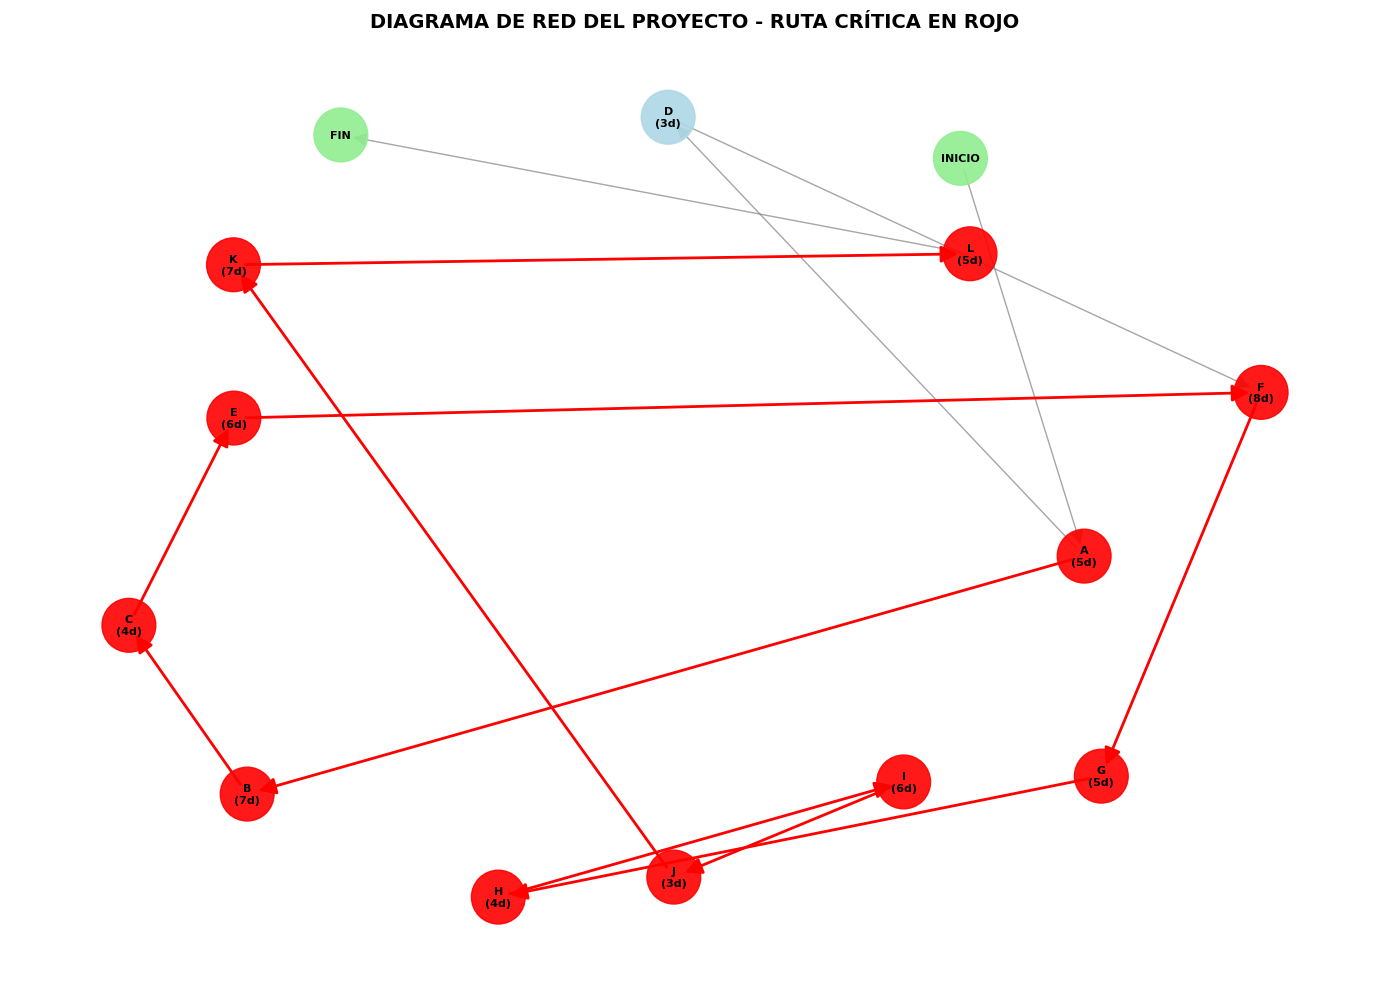

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

def crear_grafo_proyecto():
      # Crear la tabla
    actividades = {
        'A': {'descripcion': 'Análisis universo de activos', 'duracion': 5, 'costo': 15000, 'predecesores': []},
        'B': {'descripcion': 'Recolección datos históricos', 'duracion': 7, 'costo': 20000, 'predecesores': ['A']},
        'C': {'descripcion': 'Cálculo matriz correlación', 'duracion': 4, 'costo': 12000, 'predecesores': ['B']},
        'D': {'descripcion': 'Definición restricciones regulatorias', 'duracion': 3, 'costo': 8000, 'predecesores': ['A']},
        'E': {'descripcion': 'Clustering por sectores', 'duracion': 6, 'costo': 25000, 'predecesores': ['C']},
        'F': {'descripcion': 'Optimización portafolio inicial', 'duracion': 8, 'costo': 30000, 'predecesores': ['D', 'E']},
        'G': {'descripcion': 'Análisis stress testing', 'duracion': 5, 'costo': 18000, 'predecesores': ['F']},
        'H': {'descripcion': 'Ajuste por límites exposición', 'duracion': 4, 'costo': 15000, 'predecesores': ['G']},
        'I': {'descripcion': 'Documentación estrategia', 'duracion': 6, 'costo': 22000, 'predecesores': ['H']},
        'J': {'descripcion': 'Aprobación comité inversiones', 'duracion': 3, 'costo': 10000, 'predecesores': ['I']},
        'K': {'descripcion': 'Implementación operativa', 'duracion': 7, 'costo': 35000, 'predecesores': ['J']},
        'L': {'descripcion': 'Monitoreo inicial', 'duracion': 5, 'costo': 20000, 'predecesores': ['K']}
    }

    return actividades

def calcular_ruta_critica_networkx(actividades):
    """
    Calcula la ruta crítica usando NetworkX
    """
    # Crear gráfico
    G = nx.DiGraph()

    # Añadir nodos con atributos
    for actividad, datos in actividades.items():
        G.add_node(actividad,
                  descripcion=datos['descripcion'],
                  duracion=datos['duracion'],
                  costo=datos['costo'])

    # Añadir aristas
    for actividad, datos in actividades.items():
        for predecesor in datos['predecesores']:
            G.add_edge(predecesor, actividad)

    # Añadir nodo inicio y fin para cálculo de ruta crítica
    G.add_node('INICIO', descripcion='Inicio del proyecto', duracion=0, costo=0)
    G.add_node('FIN', descripcion='Fin del proyecto', duracion=0, costo=0)

    # Conectar actividades sin predecesores al INICIO
    for actividad in actividades:
        if not actividades[actividad]['predecesores']:
            G.add_edge('INICIO', actividad)

    # Conectar actividades sin sucesores al FIN
    for actividad in actividades:
        tiene_sucesores = False
        for other_act in actividades:
            if actividad in actividades[other_act]['predecesores']:
                tiene_sucesores = True
                break
        if not tiene_sucesores:
            G.add_edge(actividad, 'FIN')

    return G

def analizar_ruta_critica(G, actividades):

    # Calcular tiempos
    early_start = {}
    early_finish = {}

    # Orden para procesar nodos en orden correcto
    try:
        orden_topologico = list(nx.topological_sort(G))
    except nx.NetworkXUnfeasible:
        print("ERROR: El grafo tiene ciclos, no se puede calcular ruta crítica")
        return None, None, None

    for nodo in orden_topologico:
        if nodo == 'INICIO':
            early_start[nodo] = 0
            early_finish[nodo] = 0
        else:
            predecesores = list(G.predecessors(nodo))
            if predecesores:
                early_start[nodo] = max(early_finish[p] for p in predecesores)
            else:
                early_start[nodo] = 0
            early_finish[nodo] = early_start[nodo] + G.nodes[nodo]['duracion']

    # Calcular tiempos
    late_start = {}
    late_finish = {}
    duracion_proyecto = early_finish['FIN']

    for nodo in reversed(orden_topologico):
        if nodo == 'FIN':
            late_finish[nodo] = duracion_proyecto
            late_start[nodo] = duracion_proyecto
        else:
            # LF = min(LS de sucesores)
            sucesores = list(G.successors(nodo))
            if sucesores:
                late_finish[nodo] = min(late_start[s] for s in sucesores)
            else:
                late_finish[nodo] = duracion_proyecto
            late_start[nodo] = late_finish[nodo] - G.nodes[nodo]['duracion']

    holgura = {}
    for nodo in G.nodes():
        if nodo not in ['INICIO', 'FIN']:
            holgura[nodo] = late_start[nodo] - early_start[nodo]

    return early_start, late_start, holgura, duracion_proyecto

def identificar_ruta_critica(G, holgura):

    #Identifica las actividades en la ruta crítica
    ruta_critica = []
    for nodo in holgura:
        if holgura[nodo] == 0 and nodo not in ['INICIO', 'FIN']:
            ruta_critica.append(nodo)

    # Reconstruir la secuencia de la ruta crítica
    ruta_ordenada = []
    actividades_visitadas = set()

    def seguir_ruta(actividad_actual):
        if actividad_actual in actividades_visitadas:
            return
        actividades_visitadas.add(actividad_actual)

        # Verificar si está en ruta crítica
        if actividad_actual in ruta_critica:
            ruta_ordenada.append(actividad_actual)

            # Seguir con sucesores en ruta crítica
            for sucesor in G.successors(actividad_actual):
                if sucesor in ruta_critica:
                    seguir_ruta(sucesor)

    # Empezar desde actividades sin predecesores en ruta crítica
    for actividad in ruta_critica:
        predecesores_en_ruta = [p for p in G.predecessors(actividad) if p in ruta_critica]
        if not predecesores_en_ruta:
            seguir_ruta(actividad)

    return ruta_ordenada

def mostrar_resultados(actividades, early_start, late_start, holgura, duracion_proyecto, ruta_critica):

    #Muestra los resultados del análisis de forma organizada

    print("PROYECTO DISPERSIÓN DE ACTIVOS")

    # Crear tabla de resultados
    tabla_resultados = []
    costo_total = 0

    for actividad in actividades.keys():
        if actividad in early_start and actividad in late_start:
            fila = {
                'Actividad': actividad,
                'Descripción': actividades[actividad]['descripcion'],
                'Duración': actividades[actividad]['duracion'],
                'Costo': f"${actividades[actividad]['costo']:,}",
                'ES': early_start[actividad],
                'EF': early_start[actividad] + actividades[actividad]['duracion'],
                'LS': late_start[actividad],
                'LF': late_start[actividad] + actividades[actividad]['duracion'],
                'Holgura': holgura[actividad],
                'Ruta Crítica': '✓' if holgura[actividad] == 0 else ''
            }
            tabla_resultados.append(fila)
            costo_total += actividades[actividad]['costo']

    # Mostrar resumen
    print(f"\n{' RESUMÉN DEL PROYECTO '}")
    print(f"Duración total del proyecto: {duracion_proyecto} días")
    print(f"Costo total del proyecto: ${costo_total:,}")
    print(f"Número de actividades en ruta crítica: {len(ruta_critica)}")

    # Mostrar ruta crítica
    print(f"\n{' RUTA CRÍTICA '}")
    ruta_con_duraciones = []
    duracion_ruta = 0
    for act in ruta_critica:
        duracion = actividades[act]['duracion']
        ruta_con_duraciones.append(f"{act}({duracion})")
        duracion_ruta += duracion

    print(" → ".join(ruta_con_duraciones))
    print(f"Duración de la ruta crítica: {duracion_ruta} días")


def visualizar_red(G, ruta_critica):

    #Visualiza la red del proyecto con la ruta crítica resaltada
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=2, iterations=50)

    # Dibujar todos los nodos
    node_colors = []
    for node in G.nodes():
        if node in ['INICIO', 'FIN']:
            node_colors.append('lightgreen')
        elif node in ruta_critica:
            node_colors.append('red')
        else:
            node_colors.append('lightblue')

    # Dibujar la red
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, alpha=0.9)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20, alpha=0.7)

    # Resaltar aristas de ruta crítica
    edges_criticos = []
    for i, node in enumerate(ruta_critica):
        if i < len(ruta_critica) - 1:
            edges_criticos.append((node, ruta_critica[i+1]))

    nx.draw_networkx_edges(G, pos, edgelist=edges_criticos,
                          edge_color='red', width=2, arrows=True, arrowsize=25)

    # Etiquetas de nodos
    labels = {}
    for node in G.nodes():
        if node in ['INICIO', 'FIN']:
            labels[node] = node
        else:
            labels[node] = f"{node}\n({G.nodes[node]['duracion']}d)"

    nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

    plt.title("DIAGRAMA DE RED DEL PROYECTO - RUTA CRÍTICA EN ROJO", fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():

    # Crear datos del proyecto
    actividades = crear_grafo_proyecto()

    # Crear y analizar grafo
    G = calcular_ruta_critica_networkx(actividades)
    early_start, late_start, holgura, duracion_proyecto = analizar_ruta_critica(G, actividades)

    if early_start is None:
        return

    # Identificar ruta crítica
    ruta_critica = identificar_ruta_critica(G, holgura)

     # Mostrar resultados
    mostrar_resultados(actividades, early_start, late_start, holgura, duracion_proyecto, ruta_critica)

     # Visualizar red
    print(f"\nGráfico de la ruta crítica")
    visualizar_red(G, ruta_critica)

if __name__ == "__main__":
    main()